# Regresión polinómica:

Se crean datos sintéticos para realizar la regrresión a un polinomio.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Dataset generado')

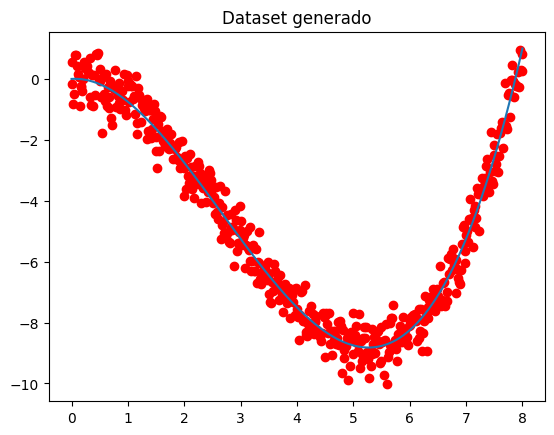

In [2]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

Para la regresión con un polinomio, se necesita preprocesar los datos `x_data` para que modelen un polinomio del grado indicado. Esto es, crear la matriz A para resolver el problema de la forma $Ax = b$, las dimensiones de la matriz A son de $m\times m$ siendo m el grado del polinomio.


**Ejercicio en clase/casa**: Variar el grado del polinomio. Los datos corresponden a un polinomio de tercer grado, Se puede apreciar que con grados inferiores, los datos van a tener un mal ajuste, y con grados superiores puede existir sobre entrenamiento, por ejemplo desde grado 20 se empiezan a notar problemas de ajuste.

### Errors

In [3]:
def get_mean_squared_error(y_real, y_pred):
  mse = (y_real - y_pred)**2
  mse = sum(mse) / len(y_real)
  return mse

def get_mean_absolute_error(y_real, y_pred):
  mae = abs(y_pred - y_real)
  mae = sum(mae) / len(y_real)
  return mae

def get_r_square(y_real, y_pred, y_test):
  mean = np.mean(y_real)
  pred = (y_pred - mean)**2
  pred = sum(pred)
  real = (y_test - mean)**2
  real = sum(real)
  r_2 = pred / real
  return r_2

def get_r(y_real, y_pred, y_test):
  mean = np.mean(y_real)
  pred = sum((y_pred - mean)**2)
  real = sum((y_test - mean)**2)
  r_2 = pred / real
  return r_2 ** 0.5

### Methods to generate multiple regressions

In [8]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

def linear_regresion_with_degree(degree):
  poly_regressor = PolynomialFeatures(degree=degree)
  poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
  # como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
  model = LinearRegression()
  model.fit(poly_features, y_data)

  y_pred = model.predict(poly_features)

  print("MSE: ", get_mean_squared_error(y_data2, y_pred))
  print("MAE: ", get_mean_absolute_error(y_data2, y_pred))
  r_2 = get_r_square(y_data2, y_pred, y_data)
  r = get_r(y_data2, y_pred, y_data)
  print("R2: ", r_2)
  print("R: ", r)

  plt.scatter(x_data, y_data2, c='r')
  plt.plot(x_data, y_pred)
  plt.title("Regresión con grado " + str(degree))

  plt.show()

  sns.histplot(y_data2 - y_pred)
  plt.title("Residuals")
  plt.show()

  return (r_2, r)

### Plots

In [9]:
r_2 = []
r = []

for i in range(1,41):
  print("///////////// Grado: ", i)
  (r_2_test, r_test) = linear_regresion_with_degree(i)
  plt.show()

  r_2.append(r_2_test)
  r.append(r_test)


Output hidden; open in https://colab.research.google.com to view.

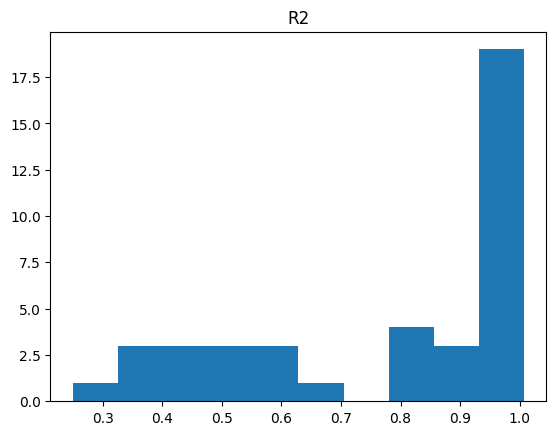

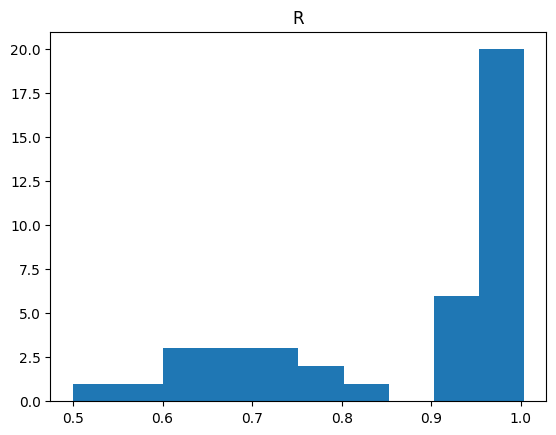

In [7]:
plt.hist(r_2)
plt.title("R2")
plt.show()

plt.hist(r)
plt.title("R")

plt.show()